In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from scipy import stats
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Job A Thon/train_s3TEQDk.csv")

## Understanding the Dataset

In [ ]:
df.shape

(245725, 11)

In [ ]:
df.columns.unique()

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [ ]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

ID

the values are:
26PFMEN9    1
ZW98CMEM    1
X9N9UMM2    1
Q7QVNVUU    1
H4GS4ZKC    1
           ..
J4BRMQUD    1
TREBN3RA    1
C4HQ792Q    1
YXEDXTXW    1
AYDMOJFG    1
Name: ID, Length: 245725, dtype: int64


Gender

the values are:
Male      134197
Female    111528
Name: Gender, dtype: int64


Region_Code

the values are:
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64


Occupation

the values are:
Self_Employed    100886
Salaried          71999
Other             70173
Entreprene

In [ ]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

Age

the values are:
28    14533
29    13284
27    13005
30    11066
26     9039
      ...  
82      749
83      694
84      624
85      604
23        1
Name: Age, Length: 63, dtype: int64


Vintage

the values are:
13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64


Avg_Account_Balance

the values are:
4022185    127
1611273     35
4126262     33
1142030     32
936814      31
          ... 
1016388      1
516680       1
1043017      1
784971       1
2760299      1
Name: Avg_Account_Balance, Length: 135292, dtype: int64


Is_Lead

the values are:
0    187437
1     58288
Name: Is_Lead, dtype: int64




In [4]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


## Corelation

<AxesSubplot:>

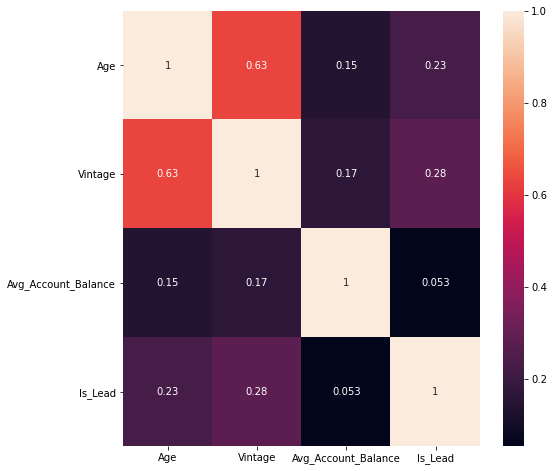

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


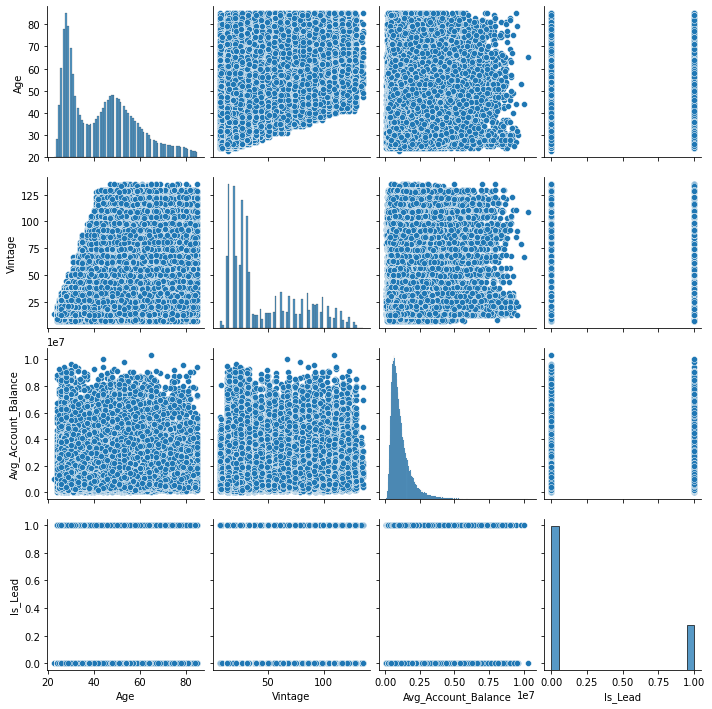

In [ ]:
sns.pairplot(df)

## Univariate Analysis

In [ ]:
df.skew()

Age                    0.618992
Vintage                0.790189
Avg_Account_Balance    2.968727
Is_Lead                1.235596
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

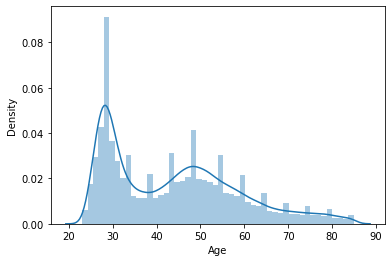

In [ ]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

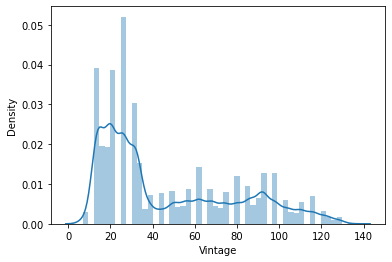

In [ ]:
sns.distplot(df["Vintage"])

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

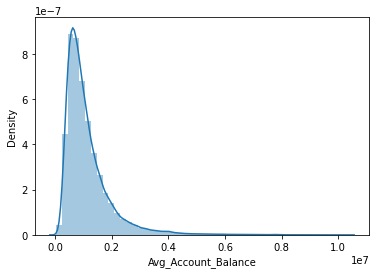

In [ ]:
sns.distplot(df["Avg_Account_Balance"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

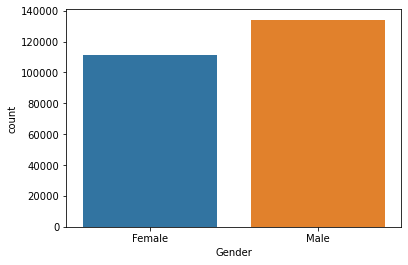

In [ ]:
sns.countplot(x="Gender", data=df)

<AxesSubplot:xlabel='Vintage', ylabel='count'>

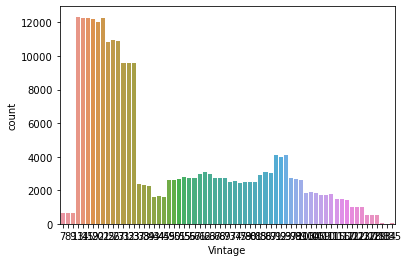

In [ ]:
sns.countplot(x="Vintage", data=df)

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

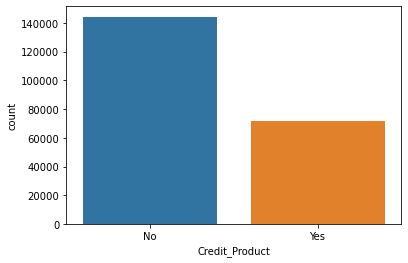

In [ ]:
sns.countplot(x="Credit_Product", data=df)

In [ ]:
## For checking the outliers 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


<AxesSubplot:xlabel='Age'>

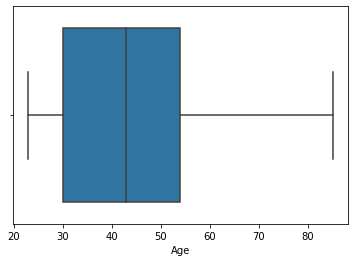

In [ ]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Vintage'>

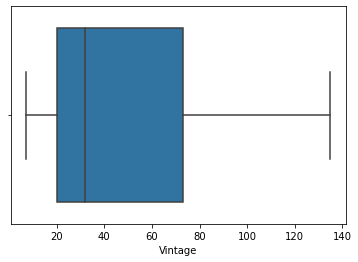

In [ ]:
sns.boxplot(df['Vintage'])

<AxesSubplot:xlabel='Avg_Account_Balance'>

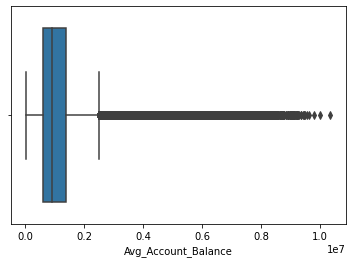

In [ ]:
sns.boxplot(df['Avg_Account_Balance'])

## Has many Outliers

## Missing Value Imputation

In [ ]:
## Now that we know each feature we are  going for Missing Value Imputation

In [ ]:
# We are checking relation between Outlet_Size and Outlet_Type.

crosstable = pd.crosstab(df['Credit_Product'],df['Age'])
crosstable.head()

Age,23,24,25,26,27,28,29,30,31,32,...,76,77,78,79,80,81,82,83,84,85
Credit_Product,,,,,,,,,,,,,,,,,,,,,
No,0,1409,4007,6991,10055,11411,10610,8993,6867,4960,...,600,569,530,547,459,443,399,347,337,298
Yes,1,478,1219,1917,2755,2878,2401,1854,1358,1040,...,346,386,333,345,280,244,209,214,174,183


In [8]:
df = df.drop(columns=['ID'])

In [8]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [9]:
df1 = df[df['Credit_Product'].isnull()]

In [10]:
df1.shape

(29325, 10)

In [10]:
df2 = df[~(df['Credit_Product'].isnull())]

In [12]:
df2.shape

(216400, 10)

In [13]:
216400 + 29325

245725

In [14]:
df.shape

(245725, 10)

In [11]:
import datawig

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=["Gender","Age","Region_Code","Occupation","Channel_Code","Vintage","Avg_Account_Balance","Is_Active","Is_Lead"], # column(s) containing information about the column we want to impute
    output_column= 'Credit_Product', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df2, num_epochs=10)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df1)

2021-05-30 11:57:59,635 [INFO]  NumExpr defaulting to 2 threads.
2021-05-30 11:58:40,835 [INFO]  
========== start: fit model
2021-05-30 11:58:40,838 [WARNING]  Already bound, ignoring bind()
2021-05-30 12:00:34,058 [INFO]  Epoch[0] Batch [0-6087]	Speed: 860.47 samples/sec	cross-entropy=0.508807	Credit_Product-accuracy=0.738019
2021-05-30 12:02:27,199 [INFO]  Epoch[0] Train-cross-entropy=0.503883
2021-05-30 12:02:27,209 [INFO]  Epoch[0] Train-Credit_Product-accuracy=0.740645
2021-05-30 12:02:27,213 [INFO]  Epoch[0] Time cost=226.365
2021-05-30 12:02:27,221 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2021-05-30 12:02:48,129 [INFO]  Epoch[0] Validation-cross-entropy=0.497672
2021-05-30 12:02:48,131 [INFO]  Epoch[0] Validation-Credit_Product-accuracy=0.744826
2021-05-30 12:04:41,453 [INFO]  Epoch[1] Batch [0-6087]	Speed: 859.68 samples/sec	cross-entropy=0.501980	Credit_Product-accuracy=0.741171
2021-05-30 12:06:34,680 [INFO]  Epoch[1] Train-cross-entropy=0.499983
2021-05

In [12]:
imputed.shape

(29325, 12)

In [ ]:
imputed.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_imputed,Credit_Product_imputed_proba
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1,Yes,0.622476
15,UJ2NJKKL,Male,33,RG268,Self_Employed,X2,69,NaN,517063,Yes,1,Yes,0.531313
31,ABPMK4WU,Female,32,RG279,Salaried,X4,15,NaN,1072850,Yes,1,Yes,0.609421
36,MTEIXMB9,Female,41,RG268,Self_Employed,X3,62,NaN,962383,No,1,Yes,0.873652
40,6WX9JDVK,Female,63,RG254,Other,X3,103,NaN,1249319,Yes,1,Yes,0.634016


In [ ]:
imputed.isnull().sum()

ID                                  0
Gender                              0
Age                                 0
Region_Code                         0
Occupation                          0
Channel_Code                        0
Vintage                             0
Credit_Product                  29325
Avg_Account_Balance                 0
Is_Active                           0
Is_Lead                             0
Credit_Product_imputed              0
Credit_Product_imputed_proba        0
dtype: int64

In [13]:
df3 = imputed.copy()

In [14]:
df3["Credit_Product"] = df3["Credit_Product_imputed"]
df3.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_imputed,Credit_Product_imputed_proba
6,Male,62,RG282,Other,X3,20,Yes,1056750,Yes,1,Yes,0.597081
15,Male,33,RG268,Self_Employed,X2,69,Yes,517063,Yes,1,Yes,0.534672
31,Female,32,RG279,Salaried,X4,15,Yes,1072850,Yes,1,Yes,0.613386
36,Female,41,RG268,Self_Employed,X3,62,Yes,962383,No,1,Yes,0.851989
40,Female,63,RG254,Other,X3,103,Yes,1249319,Yes,1,Yes,0.636460


In [15]:
df3 = df3.drop(['Credit_Product_imputed','Credit_Product_imputed_proba'], axis = 1)
df3.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,Male,62,RG282,Other,X3,20,Yes,1056750,Yes,1
15,Male,33,RG268,Self_Employed,X2,69,Yes,517063,Yes,1
31,Female,32,RG279,Salaried,X4,15,Yes,1072850,Yes,1
36,Female,41,RG268,Self_Employed,X3,62,Yes,962383,No,1
40,Female,63,RG254,Other,X3,103,Yes,1249319,Yes,1


In [ ]:
df2.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0
10,NVC424KZ,Male,53,RG254,Self_Employed,X3,123,No,980664,Yes,0


In [16]:
df_new = pd.concat([df2,df3], axis = 0)

In [ ]:
df_new.shape

(245725, 11)

In [18]:
df.shape

(245725, 10)

In [60]:
df_ori = df.copy()

In [61]:
df = df_new.copy()

## Bivariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245720
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       245725 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 20.6+ MB


In [ ]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


<AxesSubplot:xlabel='Credit_Product', ylabel='Age'>

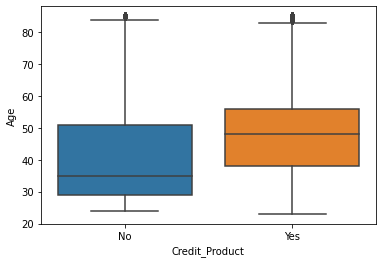

In [ ]:
sns.boxplot(x = df.Credit_Product, y = df.Age)

<AxesSubplot:xlabel='Credit_Product', ylabel='Vintage'>

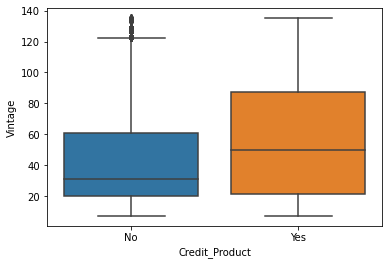

In [ ]:
sns.boxplot(x = df.Credit_Product, y = df.Vintage)

<AxesSubplot:xlabel='Credit_Product', ylabel='Avg_Account_Balance'>

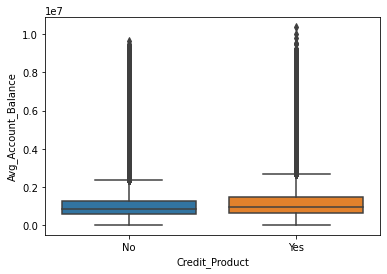

In [ ]:
sns.boxplot(x = df.Credit_Product, y = df.Avg_Account_Balance)

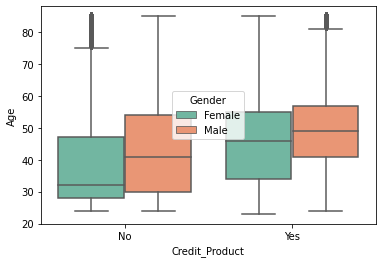

In [ ]:
sns.boxplot(x = 'Credit_Product', y ='Age', hue = 'Gender', data = df , palette="Set2" )
plt.show()

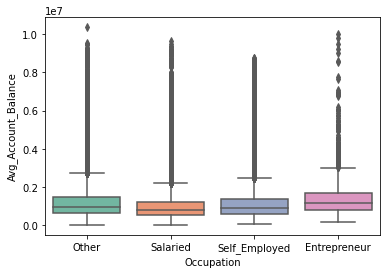

In [ ]:
sns.boxplot(x = 'Occupation', y ='Avg_Account_Balance', data = df , palette="Set2" )
plt.show()

## There is no major difference

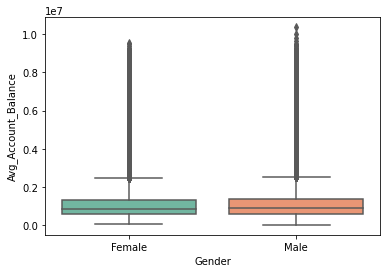

In [ ]:
sns.boxplot(x = 'Gender', y ='Avg_Account_Balance', data = df , palette="Set2" )
plt.show()

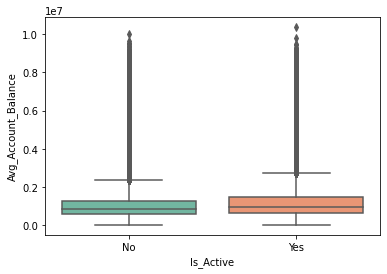

In [ ]:
sns.boxplot(x = 'Is_Active', y ='Avg_Account_Balance', data = df , palette="Set2" )
plt.show()

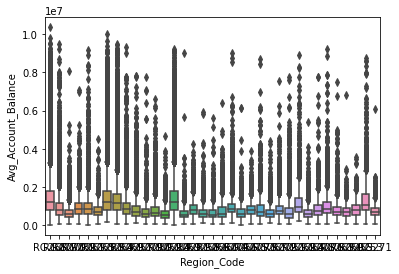

In [ ]:
sns.boxplot(x = 'Region_Code', y ='Avg_Account_Balance', data = df )
plt.show()

## Outlier Treatment 

In [62]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[10,90])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [63]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:xlabel='Avg_Account_Balance'>

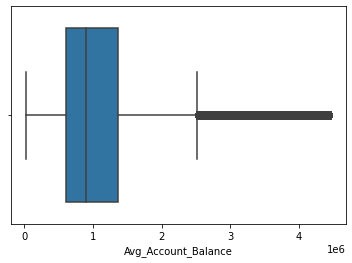

In [ ]:
sns.boxplot(df['Avg_Account_Balance'])

In [ ]:
# Now we are going to use Transformation and not intentionally imputing more outliers

In [64]:
df.Avg_Account_Balance.skew()

1.9747444814639161

### Applying Box Cox Transformation for handling skewness of the data

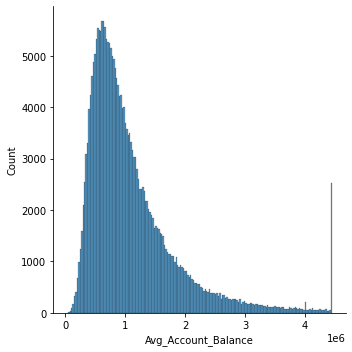

In [65]:
# Before 

sns.displot(df['Avg_Account_Balance'])

In [66]:
from sklearn.preprocessing import PowerTransformer
df['Avg_Account_Balance'],param = stats.boxcox(df.Avg_Account_Balance)

In [69]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73.0,RG268,Other,X3,43.0,No,8.456390,No,0.0
1,Female,30.0,RG277,Salaried,X1,32.0,No,8.253857,No,0.0
2,Female,56.0,RG268,Self_Employed,X3,26.0,No,8.573089,Yes,0.0
3,Male,34.0,RG270,Salaried,X1,19.0,No,8.177995,No,0.0
4,Female,30.0,RG282,Salaried,X1,33.0,No,8.400356,No,0.0


In [68]:
## Now Applying Robust Scalar

In [70]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(np.array(df["Age"].values).reshape(-1,1))
age_scaled_df = scaler.transform(np.array(df["Age"].values).reshape(-1,1))

In [71]:
scaler = RobustScaler()
scaler.fit(np.array(df["Vintage"].values).reshape(-1,1))
age_scaled_df = scaler.transform(np.array(df["Vintage"].values).reshape(-1,1))

In [67]:
df.Avg_Account_Balance.skew()

-0.0009821128292930071

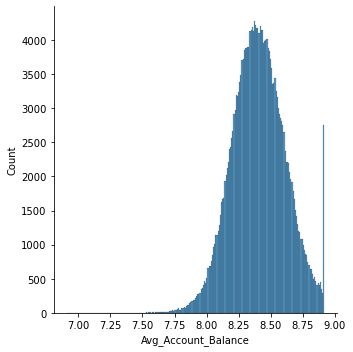

In [ ]:
# After 

sns.displot(df['Avg_Account_Balance'])

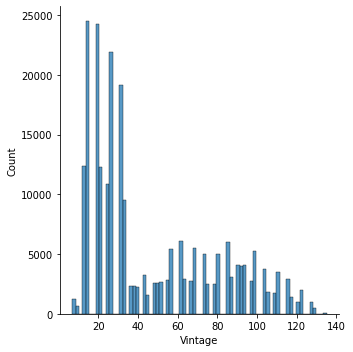

In [72]:
# After 

sns.displot(df['Vintage'])

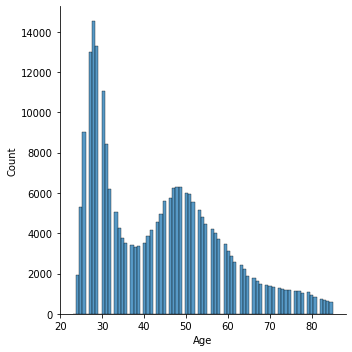

In [73]:
# After 

sns.displot(df['Age'])

In [77]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73.0,RG268,Other,X3,43.0,No,8.456390,No,0.0
1,Female,30.0,RG277,Salaried,X1,32.0,No,8.253857,No,0.0
2,Female,56.0,RG268,Self_Employed,X3,26.0,No,8.573089,Yes,0.0
3,Male,34.0,RG270,Salaried,X1,19.0,No,8.177995,No,0.0
4,Female,30.0,RG282,Salaried,X1,33.0,No,8.400356,No,0.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245720
Data columns (total 10 columns):
Gender                 245725 non-null object
Age                    245725 non-null float64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null float64
Credit_Product         245725 non-null object
Avg_Account_Balance    245725 non-null float64
Is_Active              245725 non-null object
Is_Lead                245725 non-null float64
dtypes: float64(4), object(6)
memory usage: 20.6+ MB


In [79]:
df['Age']=df['Age'].astype(int)
df['Vintage']=df['Vintage'].astype(int)
df['Is_Lead']=df['Is_Lead'].astype(int)

In [80]:
df.skew()

Age                    0.618992
Vintage                0.790189
Avg_Account_Balance   -0.000982
Is_Lead                1.235596
dtype: float64

In [ ]:
df.head()

## Splitting Dependent and independent Variables 

In [81]:
X=df.drop(columns=['Is_Lead'])
y=df['Is_Lead']

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245720
Data columns (total 10 columns):
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         245725 non-null object
Avg_Account_Balance    245725 non-null float64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 20.6+ MB


In [41]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,8.456390,No,0
1,Female,30,RG277,Salaried,X1,32,No,8.253857,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,8.573089,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,8.177995,No,0
4,Female,30,RG282,Salaried,X1,33,No,8.400356,No,0


In [83]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
num =  ['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']


In [84]:
df.Channel_Code.describe()

count     245725
unique         4
top           X1
freq      103718
Name: Channel_Code, dtype: object

In [90]:
df.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [92]:
X = X.replace({'Channel_Code':{'X1':1,"X2":2,"X3":3,"X4":4}})

In [94]:
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,3,43,No,8.456390,No
1,Female,30,RG277,Salaried,1,32,No,8.253857,No
2,Female,56,RG268,Self_Employed,3,26,No,8.573089,Yes
3,Male,34,RG270,Salaried,1,19,No,8.177995,No
4,Female,30,RG282,Salaried,1,33,No,8.400356,No


In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245720
Data columns (total 9 columns):
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null int64
Vintage                245725 non-null int64
Credit_Product         245725 non-null object
Avg_Account_Balance    245725 non-null float64
Is_Active              245725 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 18.7+ MB


In [96]:
X.skew()

Age                    0.618992
Channel_Code           0.386726
Vintage                0.790189
Avg_Account_Balance   -0.000982
dtype: float64

In [97]:
X = pd.get_dummies(X, drop_first =True)

In [98]:
X.shape

(245725, 44)

In [166]:
X.head()

AttributeError: ignored

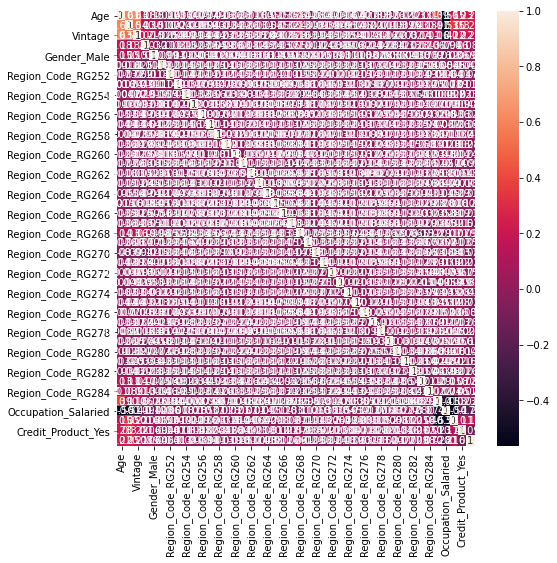

In [100]:
plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True)

In [101]:
X.corr()

,Age,Channel_Code,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Credit_Product_Yes,Is_Active_Yes
Age,1.000000,0.605543,0.631242,0.178185,0.152076,-0.001587,-0.073380,0.015840,-0.004748,-0.007654,-0.056651,-0.049304,-0.016097,-0.035638,-0.028189,-0.070732,-0.016068,-0.014699,-0.050230,0.015043,-0.035327,-0.035836,0.144657,-0.026423,-0.082564,-0.041855,-0.000972,-0.014226,-0.061703,-0.042179,0.016892,-0.033266,0.008717,-0.026369,-0.011980,-0.031743,-0.030417,0.128951,0.100459,0.394834,-0.563227,0.152652,0.225373,0.218770
Channel_Code,0.605543,1.000000,0.537852,0.128762,0.150586,0.011278,-0.072221,0.024235,0.002198,-0.009886,-0.058986,-0.043491,-0.007332,-0.024420,-0.021556,-0.076180,-0.013167,-0.011458,-0.055783,0.014726,-0.031998,-0.033784,0.126589,-0.015686,-0.090094,-0.038511,-0.007914,-0.009065,-0.056508,-0.045559,0.020038,-0.026554,0.010131,-0.014938,0.003934,-0.024577,-0.042789,0.113673,0.088526,0.113677,-0.506250,0.349161,0.300168,0.249655
Vintage,0.631242,0.537852,1.000000,0.202898,0.146380,-0.025112,-0.059256,0.004940,0.002861,-0.012908,-0.049180,-0.044247,-0.023394,-0.028684,-0.024528,-0.068367,-0.014733,-0.028037,-0.049172,-0.000795,-0.024908,-0.028311,0.156560,-0.031461,-0.094138,-0.035252,-0.018134,-0.025060,-0.053746,-0.040785,0.002779,-0.032454,0.001640,-0.027428,-0.027426,-0.030059,-0.027349,0.136958,0.108678,0.155663,-0.410109,0.221024,0.216839,0.209356
Avg_Account_Balance,0.178185,0.128762,0.202898,1.000000,0.032409,-0.106590,-0.114100,0.031472,0.146035,-0.022635,-0.077732,-0.063659,-0.058518,-0.086400,-0.067567,-0.018274,0.011863,-0.044723,-0.074090,-0.032903,-0.057347,-0.054641,0.187463,-0.017089,-0.116014,-0.041396,-0.036475,-0.050101,-0.006013,-0.032376,-0.002253,-0.043570,-0.023182,-0.084414,-0.122436,-0.033321,-0.022671,0.171414,0.134461,0.067210,-0.094126,0.016224,0.101408,0.088652
Gender_Male,0.152076,0.150586,0.146380,0.032409,1.000000,0.009920,-0.012969,0.011445,0.019024,-0.005985,-0.013659,-0.011973,-0.000690,-0.002426,-0.000179,-0.015482,0.003609,-0.002997,-0.011592,0.004516,-0.005607,-0.010668,0.009843,-0.001217,-0.015093,-0.007880,-0.001088,0.003053,-0.011315,-0.013403,0.002985,-0.002889,0.008476,-0.005792,0.007188,-0.004270,0.003256,0.007532,0.008954,0.025818,-0.122439,0.085863,0.068638,0.064207
Region_Code_RG251,-0.001587,0.011278,-0.025112,-0.106590,0.009920,1.000000,-0.020988,-0.013750,-0.055162,-0.014335,-0.017055,-0.025136,-0.014093,-0.016246,-0.017835,-0.028205,-0.013487,-0.019442,-0.016891,-0.012535,-0.012664,-0.012333,-0.065195,-0.028641,-0.028371,-0.012518,-0.023280,-0.021508,-0.023357,-0.018223,-0.016802,-0.036967,-0.013615,-0.020202,-0.036890,-0.022917,-0.024555,-0.058091,-0.046017,-0.000538,-0.003571,0.005658,-0.004551,-0.006294
Region_Code_RG252,-0.073380,-0.072221,-0.059256,-0.114100,-0.012969,-0.020988,1.000000,-0.011630,-0.046656,-0.012124,-0.014425,-0.021260,-0.011919,-0.013741,-0.015085,-0.023856,-0.011407,-0.016444,-0.014286,-0.010602,-0.010711,-0.010431,-0.055142,-0.024224,-0.023996,-0.010588,-0.019690,-0.018192,-0.019755,-0.015413,-0.014211,-0.031267,-0.011516,-0.017087,-0.031201,-0.019384,-0.020769,-0.049133,-0.038921,-0.013694,0.059638,-0.040612,-0.046978,-0.040540
Region_Code_RG253,0.015840,0.024235,0.004940,0.031472,0.011445,-0.013750,-0.011630,1.000000,-0.030565,-0.007943,-0.009450,-0.013928,-0.007809,-0.009002,-0.0

In [102]:
y.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [ ]:
## The data is imbalanced 

## Treating Imbaalnced Dataset

In [103]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))

Before OverSampling, the shape of X: (245725, 44)
Before OverSampling, the shape of y: (245725,) 

Before OverSampling, counts of label '0': 187437
Before OverSampling, counts of label '1': 58288


In [104]:
# using SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X, y = sm.fit_sample(X, y.ravel())

In [105]:
print('After OverSampling, the shape of X: {}'.format(X.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y.shape))

print("After Sampling, counts of label '0': {}".format(sum(y == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y == 1)))

After OverSampling, the shape of X: (374874, 44)
After OverSampling, the shape of y: (374874,) 

After Sampling, counts of label '0': 187437
After OverSampling, counts of label '1': 187437


## Applying Logistic Regression 

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=0)

In [107]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
ytrain_predict = model_lr.predict(X_train)
ytest_predict = model_lr.predict(X_test)

In [109]:
ytest_predict_prob=model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.852028,0.147972
1,0.197023,0.802977
2,0.118532,0.881468
3,0.302852,0.697148
4,0.087649,0.912351


In [110]:
model_lr.score(X_train, y_train)

0.7644679980793513

In [111]:
model_lr.score(X_test, y_test)

0.7641993619223423

[[34994 12266]
 [ 9833 36626]]


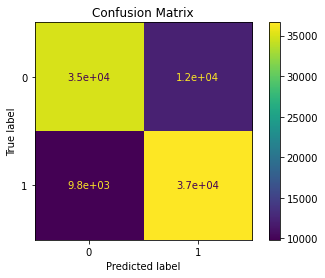

In [112]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(model_lr, X_test, y_test)
cmap=plt.cm.Blues
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

In [113]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     47260
           1       0.75      0.79      0.77     46459

    accuracy                           0.76     93719
   macro avg       0.76      0.76      0.76     93719
weighted avg       0.77      0.76      0.76     93719



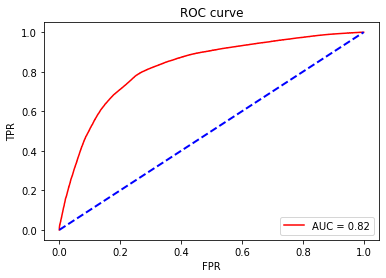

In [114]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = model_lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [115]:
roc_auc_score(y_test, preds)

0.8242512785516855

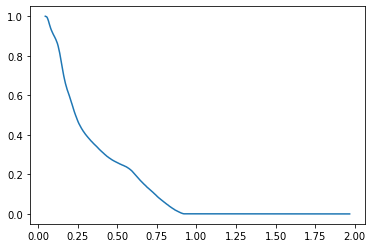

In [116]:
plt.plot(threshold,fpr)

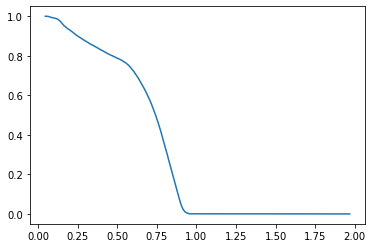

In [117]:
plt.plot(threshold,tpr)

## Threshold Method

In [118]:
from sklearn.metrics import precision_recall_curve
probs = model_lr.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

(0.0, 1.0)

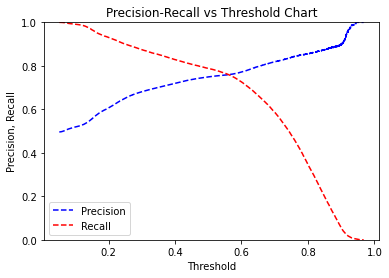

In [119]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

In [ ]:
## Now using the threshold as 0.55

In [120]:
threshold = 0.55
pred = np.where(model_lr.predict_proba(X_test)[:,1] >= threshold, 1, 0)

In [121]:
labels = [1, 0]
con_mat2 = confusion_matrix(y_test, pred, labels = labels )
print(con_mat2)

[[35599 10860]
 [11386 35874]]


In [122]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76     47260
           1       0.76      0.77      0.76     46459

    accuracy                           0.76     93719
   macro avg       0.76      0.76      0.76     93719
weighted avg       0.76      0.76      0.76     93719



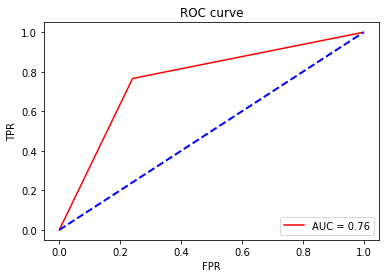

In [123]:
fpr, tpr, threshold = roc_curve(y_test, pred, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## XG Boost

In [124]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 83.91
Time consumed for training: 36.805
Time consumed for prediction: 0.28445 seconds


[[39117  8143]
 [ 6939 39520]]


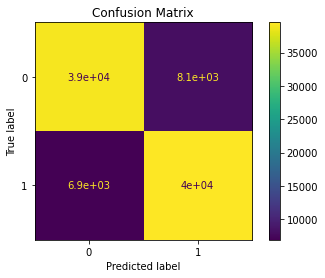

In [125]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(xgb, X_test, y_test)
cmap=plt.cm.Blues
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

In [126]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     47260
           1       0.83      0.85      0.84     46459

    accuracy                           0.84     93719
   macro avg       0.84      0.84      0.84     93719
weighted avg       0.84      0.84      0.84     93719



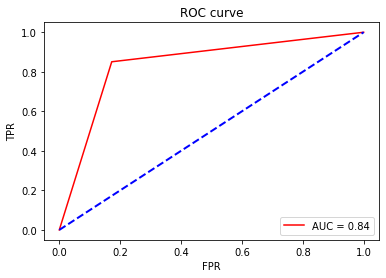

In [127]:
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Hyperparameter Tuning

In [128]:
# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [129]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [130]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [131]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.7879085350889361
SCORE:
0.8385172697105177
SCORE:
0.8411634780567441
SCORE:
0.7986214108131755
SCORE:
0.7991229099755652
SCORE:
0.840235171096576
SCORE:
0.8377276752846274
SCORE:
0.8389334073133516
SCORE:
0.8383785571762397
SCORE:
0.796828818062506
SCORE:
0.8402671816814093
SCORE:
0.8389867582880739
SCORE:
0.8430627727568583
SCORE:
0.7995923985531216
SCORE:
0.7973729980046735
SCORE:
0.7990375484160096
SCORE:
0.8391254708223519
SCORE:
0.801822469296514
SCORE:
0.7973943383945624
SCORE:
0.8391574814071853
SCORE:
0.8420811148219678
SCORE:
0.8426359649590798
SCORE:
0.8426252947641354
SCORE:
0.843148134316414
SCORE:
0.842571943789413
SCORE:
0.8429560708074136
SCORE:
0.842433231255135
SCORE:
0.8419744128725232
SCORE:
0.837023442418293
SCORE:
0.84065130869941
SCORE:
0.8411848184466331
SCORE:
0.8426893159338021
SCORE:
0.8367993683244593
SCORE:
0.8403952240207428
SCORE:
0.8397016613493529
SCORE:
0.8412381694213553
SCORE:
0.8414302329303557
SCORE:
0.8437883460130816
SCORE:
0.843606952699

In [132]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6179708019324046, 'gamma': 8.721558861711202, 'max_depth': 18.0, 'min_child_weight': 7.0, 'reg_alpha': 41.0, 'reg_lambda': 0.4812978401617444}


In [133]:
clf = xgb.XGBClassifier (n_estimators =180,max_depth= 18,gamma = 8.721558861711202,
reg_alpha=41.0,reg_lambda= 0.4812978401617444,
colsample_bytree=0.6179708019324046,
min_child_weight=7,
seed=0)
    
evaluation = [( X_train, y_train), ( X_test, y_test)]
    
clf.fit(X_train, y_train,eval_set=evaluation, eval_metric="auc",early_stopping_rounds=10,verbose=False)
    

pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred>0.5)
print ("SCORE:", accuracy)

SCORE: 0.8717762673524045


In [135]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     47260
           1       0.88      0.85      0.87     46459

    accuracy                           0.87     93719
   macro avg       0.87      0.87      0.87     93719
weighted avg       0.87      0.87      0.87     93719



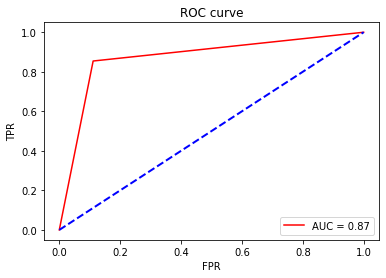

In [136]:
fpr, tpr, threshold = roc_curve(y_test, pred, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

## Random Forest

In [137]:
rfc = RandomForestClassifier(n_estimators=100)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 87.30
Time consumed for training: 70.649 seconds
Time consumed for prediction: 3.92527 seconds


[[41762  5498]
 [ 6401 40058]]


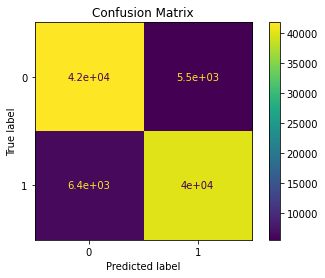

In [138]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(rfc, X_test, y_test)
cmap=plt.cm.Blues
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

In [139]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     47260
           1       0.88      0.86      0.87     46459

    accuracy                           0.87     93719
   macro avg       0.87      0.87      0.87     93719
weighted avg       0.87      0.87      0.87     93719



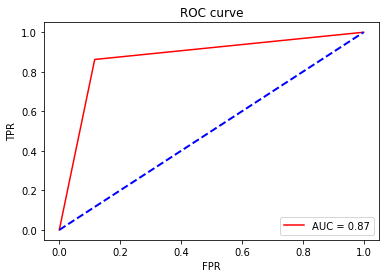

In [140]:
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
rfc = RandomForestClassifier(n_estimators=500, criterion='gini',max_leaf_nodes=None,min_samples_split=4,min_samples_leaf=1)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

## For Test Datasets

In [146]:
df_test=pd.read_csv("/content/drive/MyDrive/Job A Thon/test_mSzZ8RL.csv")

In [147]:
df_test.shape

(105312, 10)

In [148]:
df_test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [149]:
## Test


df = df_test.copy()
df = df.drop(['ID'], axis =1)
df1 = df[df['Credit_Product'].isnull()]
df2 = df[~(df['Credit_Product'].isnull())]

import datawig

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=["Gender","Age","Region_Code","Occupation","Channel_Code","Vintage","Avg_Account_Balance","Is_Active"], # column(s) containing information about the column we want to impute
    output_column= 'Credit_Product', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df2, num_epochs=10)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df1)

df3 = imputed.copy()
df3["Credit_Product"] = df3["Credit_Product_imputed"]
df3 = df3.drop(['Credit_Product_imputed','Credit_Product_imputed_proba'], axis = 1)
df_new = pd.concat([df2,df3], axis = 0)
df_ori = df.copy()
df = df_new.copy()



def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[10,90])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur
	
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])
		
from sklearn.preprocessing import PowerTransformer
df['Avg_Account_Balance'],param = stats.boxcox(df.Avg_Account_Balance)

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(np.array(df["Age"].values).reshape(-1,1))
age_scaled_df = scaler.transform(np.array(df["Age"].values).reshape(-1,1))
scaler = RobustScaler()
scaler.fit(np.array(df["Vintage"].values).reshape(-1,1))
age_scaled_df = scaler.transform(np.array(df["Vintage"].values).reshape(-1,1))

df['Age']=df['Age'].astype(int)
df['Vintage']=df['Vintage'].astype(int)


df = df.replace({'Channel_Code':{'X1':1,"X2":2,"X3":3,"X4":4}})

df = pd.get_dummies(df, drop_first =True)
df_real_test = df.copy()

In [179]:
df_real_test = df.copy()

In [171]:
df.head()

,Age,Channel_Code,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Credit_Product_Yes,Is_Active_Yes
0,29,1,25,8.015623,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,31,1,14,7.605402,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,29,1,33,8.064570,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,29,1,19,7.976984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,60,3,110,8.541391,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
